In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

The task of this Course is to classify handwritten digits.

Classifying Handwritten digits

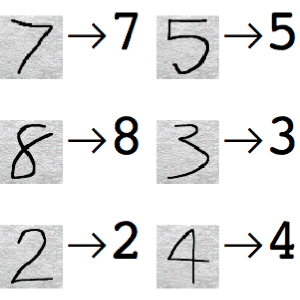

# About the MNIST dataset

It is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

Its each image has 28*28 pixels i.e784 pixels

# Fetching the data

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the dataset



In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [3]:
mnist.target = mnist.target.astype(np.int8)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([5, 0, 4, ..., 4, 5, 6], dtype=int8),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel

In [4]:
# data=pd.DataFrame(mnist["data"])
# data2=pd.DataFrame(mnist["target"])
# then concatinate data and data2 
# so we can also make dataframe and then use

# Sampling

In [5]:
x, y = mnist["data"], mnist["target"]
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

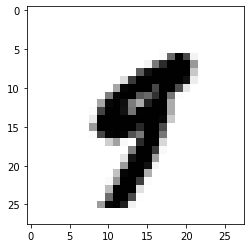

In [7]:
some_digit = x[36000]   
some_digit_image = some_digit.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

In [8]:
x[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

(array([6903., 7877., 6990., 7141., 6824., 6313., 6876., 7293., 6825.,
        6958.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

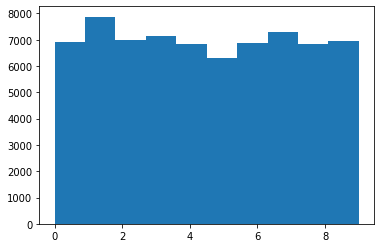

In [9]:
plt.hist(y)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(y,y):
    X_strat_train_set = x[train_index]
    Y_strat_train_set = y[train_index]
    X_strat_test_set = x[test_index]
    Y_strat_test_set = y[test_index]

(array([5522., 6302., 5592., 5713., 5459., 5051., 5501., 5834., 5460.,
        5566.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

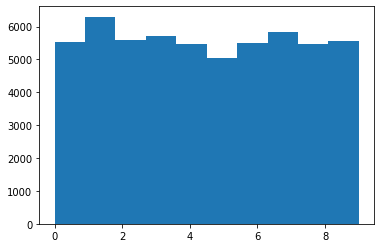

In [11]:
plt.hist(Y_strat_train_set)

(array([1381., 1575., 1398., 1428., 1365., 1262., 1375., 1459., 1365.,
        1392.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

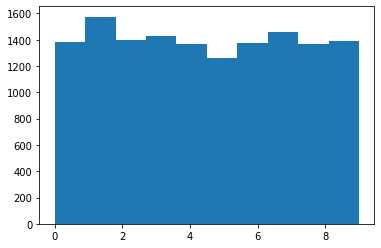

In [12]:
plt.hist(Y_strat_test_set)

# Selecting appropriate model

SGD Classifier

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10) 
sgd_clf.fit(X_strat_train_set, Y_strat_train_set)

/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10, random_state=42)

In [14]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, X_strat_train_set, Y_strat_train_set, cv=10, scoring="accuracy").mean())

/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarn

0.8579821428571428


/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [15]:
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(sgd_clf, X_strat_train_set, Y_strat_train_set, cv=10)
Y_train_pred

/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarn

array([0, 7, 0, ..., 1, 9, 7], dtype=int8)

In [16]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print ("Precision score is : " , precision_score(Y_strat_train_set, Y_train_pred ,average='weighted'))
print ("Recall score is : " , recall_score(Y_strat_train_set, Y_train_pred , average='weighted'))
print ("f1 score is : " , f1_score(Y_strat_train_set, Y_train_pred, average='weighted'))

# Y_scores = cross_val_predict(sgd_clf, X_strat_train_set, Y_strat_train_set, cv=2,method="decision_function")
# print(Y_scores)
# print ("ROC score is : " , roc_auc_score(Y_strat_train_set, Y_scores , average='weighted')) 

Precision score is :  0.8695001316504312
Recall score is :  0.8579821428571428
f1 score is :  0.8592098963041179


In [17]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_strat_train_set, Y_strat_train_set)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.model_selection import cross_val_predict
Y_train_pred_forest = cross_val_predict(forest_clf, X_strat_train_set, Y_strat_train_set, cv=10)
Y_train_pred_forest

array([0, 7, 0, ..., 1, 9, 7], dtype=int8)

In [19]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(forest_clf, X_strat_train_set, Y_strat_train_set, cv=10, scoring="accuracy").mean())

0.9680892857142858


In [20]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print ("Precision score is : " , precision_score(Y_strat_train_set, Y_train_pred_forest ,average='weighted'))
print ("Recall score is : " , recall_score(Y_strat_train_set, Y_train_pred_forest , average='weighted'))
print ("f1 score is : " , f1_score(Y_strat_train_set, Y_train_pred_forest, average='weighted'))

Precision score is :  0.9680791598197082
Recall score is :  0.9680892857142858
f1 score is :  0.9680671210561568


# now clear the image for better performance 

In [21]:
import numpy.random as rnd

noise_train = rnd.randint(0, 100, (len(X_strat_train_set), 784))
XX=X_strat_train_set + noise_train
YY=X_strat_train_set

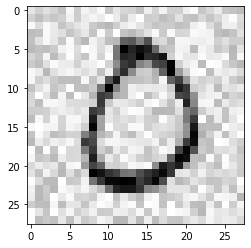

In [22]:
some_digit_2 = XX[600]   
some_digit_image_2 = some_digit_2.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image_2, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

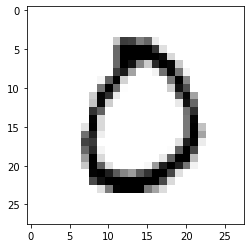

In [23]:
some_digit_3 = YY[600]   
some_digit_image_3 = some_digit_3.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image_3, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_img_clear_clf = KNeighborsClassifier()

In [25]:
knn_img_clear_clf.fit(XX,YY)

KNeighborsClassifier()

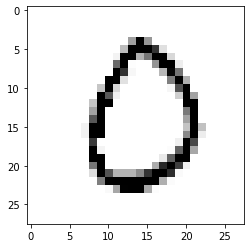

In [26]:
some_digit_4 = knn_img_clear_clf.predict([XX[600]])  
some_digit_image_4 = some_digit_4.reshape(28, 28) # Reshaping it to get the 28x28 pixels
plt.imshow(some_digit_image_4, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

In [27]:
XXX=knn_img_clear_clf.predict(XX)

# now again use model

In [28]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=10) 
sgd_clf.fit(XXX , Y_strat_train_set)

/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10, random_state=42)

In [29]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, XXX , Y_strat_train_set, cv=10, scoring="accuracy").mean())

/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarn

0.8972678571428572


/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [30]:
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(sgd_clf, XXX , Y_strat_train_set, cv=10)
Y_train_pred

/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/pranavvatsal/python3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarn

array([0, 7, 0, ..., 1, 9, 7], dtype=int8)

In [31]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print ("Precision score is : " , precision_score(Y_strat_train_set, Y_train_pred ,average='weighted'))
print ("Recall score is : " , recall_score(Y_strat_train_set, Y_train_pred , average='weighted'))
print ("f1 score is : " , f1_score(Y_strat_train_set, Y_train_pred, average='weighted'))

# Y_scores = cross_val_predict(sgd_clf, X_strat_train_set, Y_strat_train_set, cv=2,method="decision_function")
# print(Y_scores)
# print ("ROC score is : " , roc_auc_score(Y_strat_train_set, Y_scores , average='weighted')) 

Precision score is :  0.898141046693473
Recall score is :  0.8972678571428572
f1 score is :  0.8970490949878042


In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(XXX, Y_strat_train_set)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.model_selection import cross_val_predict
Y_train_pred_forest = cross_val_predict(forest_clf, XXX , Y_strat_train_set, cv=10)
Y_train_pred_forest

array([0, 7, 0, ..., 1, 9, 7], dtype=int8)

In [34]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(forest_clf, XXX , Y_strat_train_set, cv=10, scoring="accuracy").mean())

0.9582857142857144


In [35]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print ("Precision score is : " , precision_score(Y_strat_train_set, Y_train_pred_forest ,average='weighted'))
print ("Recall score is : " , recall_score(Y_strat_train_set, Y_train_pred_forest , average='weighted'))
print ("f1 score is : " , f1_score(Y_strat_train_set, Y_train_pred_forest, average='weighted'))

Precision score is :  0.9586536673381612
Recall score is :  0.9582857142857143
f1 score is :  0.9581206021459467


# Checking on test set

Conclusion-> Clearing the data improves the image and thus results in better prediction but it uses KNeighbour Classifier which takes lots of time to fit and even to predit , thus simply using random forest is good for fast prediction of large data 

In [36]:
from sklearn.ensemble import RandomForestClassifier
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_strat_train_set , Y_strat_train_set)

RandomForestClassifier(random_state=42)

In [37]:
final_prediction = final_model.predict(X_strat_test_set)

In [38]:
final_prediction

array([7, 3, 1, ..., 6, 2, 8], dtype=int8)

In [39]:
Y_strat_test_set

array([7, 3, 1, ..., 6, 2, 8], dtype=int8)

In [40]:
#accuracy

In [41]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print ("Precision score is : " , precision_score(Y_strat_test_set, final_prediction ,average='weighted'))
print ("Recall score is : " , recall_score(Y_strat_test_set, final_prediction , average='weighted'))
print ("f1 score is : " , f1_score(Y_strat_test_set, final_prediction , average='weighted'))

Precision score is :  0.966153409234403
Recall score is :  0.9661428571428572
f1 score is :  0.966122770557204


In [42]:
# almost 96.6% accuracy

In [43]:
#model done and dusted